<a href="https://colab.research.google.com/github/AndresCesana/Comunicaciones-Digitales-I-Fundacion-Fulgor/blob/main/Trabajo-1/Trabajo_1_Filtrado_Digital_y_Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Filtrado Digital y Transformada de Fourier**

In [ ]:
# Este es un trabajo del curso "Comunicaciones Digitales I" de la fundacíon Fulgor.
# Profesor: Horacio Mendoza.
# Integrantes: Andrés Agustín Cesana, Matias Mancini

# **Instalar al iniciar**


In [1]:
# Instalacion de dos librerias para calcular y graficar, se debe instalar al arrancar las simulaciones
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy.signal import lfilter, freqz, convolve
!pip install plotly


# **Ejercicio 2.41**

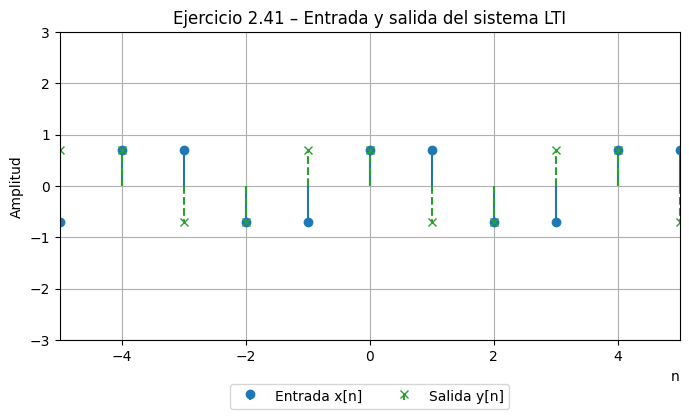

In [11]:
# =========================================
# 1) Generar y guardar la figura
# =========================================
import numpy as np
import matplotlib.pyplot as plt
import pathlib, subprocess, os

# ---------- Datos ----------
n   = np.arange(-10, 11)
w   = 3 * np.pi / 2
phi = np.pi / 4
x   = np.cos(w * n + phi)
theta = -w / 3
y   = np.cos(w * n + phi + theta)

# ---------- Gráfico ----------
plt.figure(figsize=(8, 4))
plt.stem(n, x, basefmt=" ", linefmt='C0-', markerfmt='C0o', label='Entrada x[n]')
plt.stem(n, y, basefmt=" ", linefmt='C2--', markerfmt='C2x', label='Salida y[n]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=True)

plt.title("Ejercicio 2.41 – Entrada y salida del sistema LTI")
plt.xlabel("n", loc="right")
plt.ylabel("Amplitud")
plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.grid(True)


# **Ejercicio 2.44**

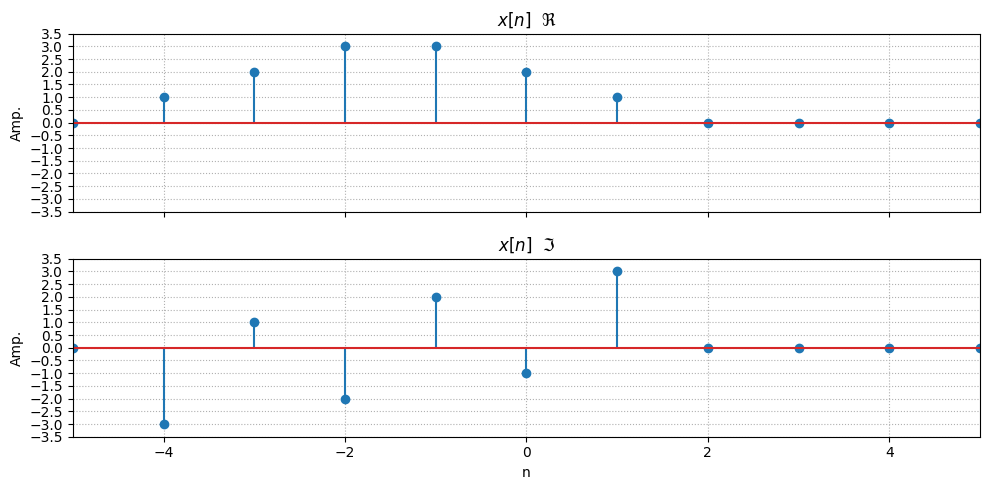

(a)  X(e^{j0}) = (12+0j)
(b)  X(e^{jπ}) = -12j
(c)  ∫_−π^π X(e^{jω}) dω = (12.566370614359172-6.283185307179586j)


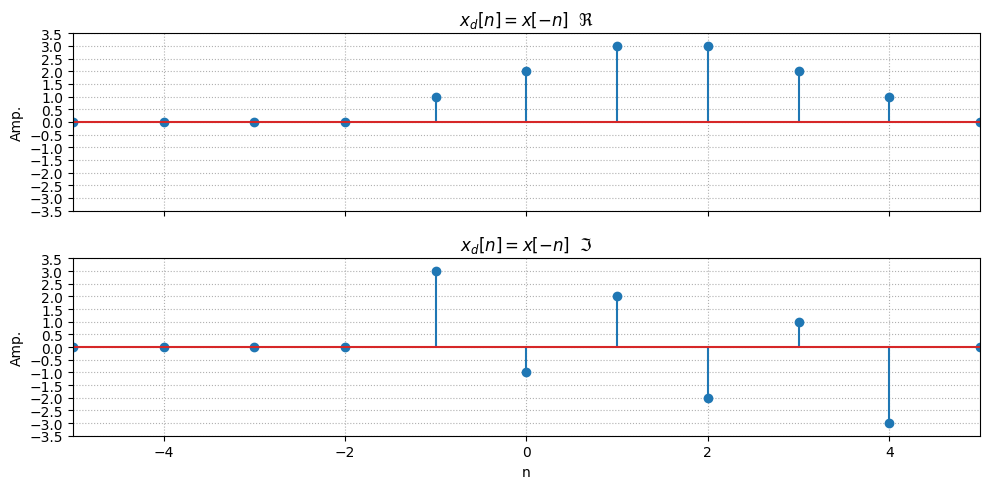

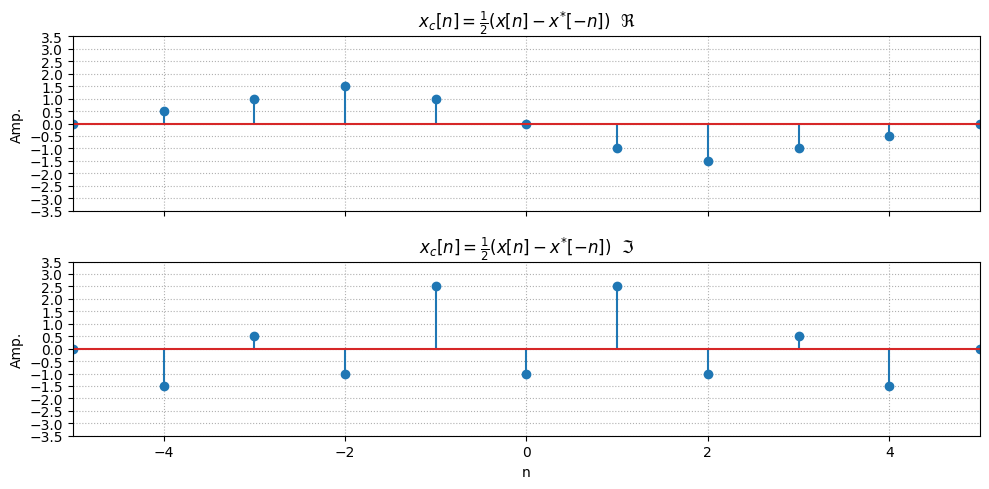

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# -----------------------------------------------------------------------------
# 0) Datos originales ---------------------------------------------------------
# -----------------------------------------------------------------------------
N_MIN, N_MAX = -5, 5                     # rango visible
n = np.arange(N_MIN, N_MAX + 1)          # [-5 … 2]

_real = { -4: 1, -3: 2, -2: 3, -1: 3, 0: 2, 1: 1 }
_imag = { -4:-3, -3: 1, -2:-2, -1: 2, 0:-1, 1: 3 }

x_real = np.zeros_like(n, dtype=float)
x_imag = np.zeros_like(n, dtype=float)
for k, v in _real.items(): x_real[n == k] = v
for k, v in _imag.items(): x_imag[n == k] = v
x = x_real + 1j * x_imag                 # señal compleja

# -----------------------------------------------------------------------------
# Función de apoyo: par de stem‑plots -----------------------------------------
# -----------------------------------------------------------------------------

def stem_pair(eje_n, y_re, y_im, titulo):
    """Dibuja parte real e imaginaria con ejes normalizados."""
    fig, (ar, ai) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
    for ax, y, lbl in ((ar, y_re, r'$\Re$'), (ai, y_im, r'$\Im$')):
        ax.stem(eje_n, y)
        ax.set_xlim(-5, 5)
        ax.set_ylim(-3.5, 3.5)
        ax.set_title(f'{titulo}  {lbl}')
        ax.set_ylabel('Amp.')
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.grid(True, linestyle=':')
    ai.set_xlabel('n')
    plt.tight_layout(); plt.show()

# -----------------------------------------------------------------------------
# Grafico de la señal original ------------------------------------------------
# -----------------------------------------------------------------------------
stem_pair(n, x.real, x.imag, '$x[n]$')

# -----------------------------------------------------------------------------
# (a)  X(e^{jω}) | ω = 0 ------------------------------------------------------
# -----------------------------------------------------------------------------
X_w0 = np.sum(x)
print(f'(a)  X(e^{{j0}}) = {X_w0}')

# -----------------------------------------------------------------------------
# (b)  X(e^{jω}) | ω = π ------------------------------------------------------
# -----------------------------------------------------------------------------
X_wpi = np.sum(x * (-1.0) ** n)   # e^{-jπ n} = (-1)^n
print(f'(b)  X(e^{{jπ}}) = {X_wpi}')

# -----------------------------------------------------------------------------
# (c)  ∫ X dω  (propiedad x[0]) -----------------------------------------------
# -----------------------------------------------------------------------------
idx0 = np.where(n == 0)[0][0]
area = 2 * np.pi * x[idx0]
print(f'(c)  ∫_−π^π X(e^{{jω}}) dω = {area}')

# -----------------------------------------------------------------------------
# (d)  x_d[n] = x[-n] -----------------------------------------------------------
# -----------------------------------------------------------------------------
idx_of_n = { nk: i for i, nk in enumerate(n) }
x_d = np.zeros_like(x, dtype=complex)
for i, nk in enumerate(n):
    tgt = -nk
    if tgt in idx_of_n:
        x_d[i] = x[idx_of_n[tgt]]

stem_pair(n, x_d.real, x_d.imag, '$x_d[n]=x[-n]$')

# -----------------------------------------------------------------------------
# (e)  x_c[n] = ½ (x[n] – x*[-n]) ---------------------------------------------
# -----------------------------------------------------------------------------
x_star_neg = np.zeros_like(x, dtype=complex)
for i, nk in enumerate(n):
    tgt = -nk
    if tgt in idx_of_n:
        x_star_neg[i] = np.conj(x[idx_of_n[tgt]])

x_c = 0.5 * (x - x_star_neg)

stem_pair(
    n,
    x_c.real,
    x_c.imag,
    r'$x_c[n]=\frac{1}{2}(x[n]-x^{*}[-n])$') # Changed \bigl and \bigr to ( and )

# -----------------------------------------------------------------------------
# Fin --------------------------------------------------------------------------

# **Ejercicio 2.45**

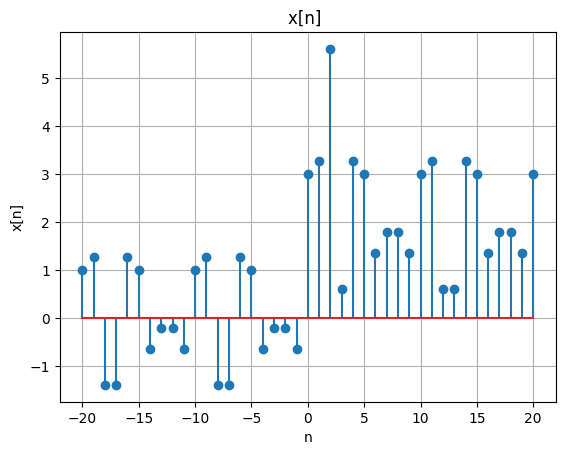

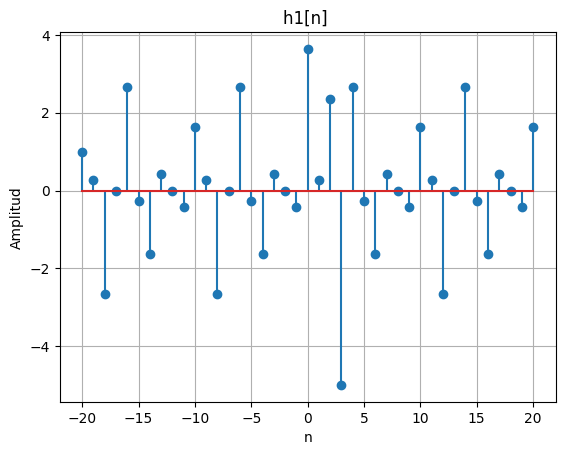

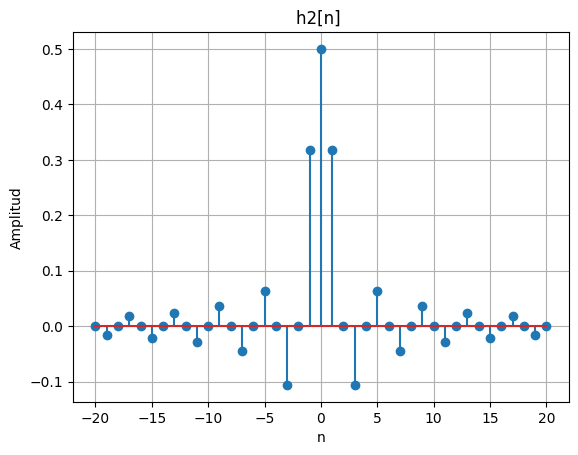

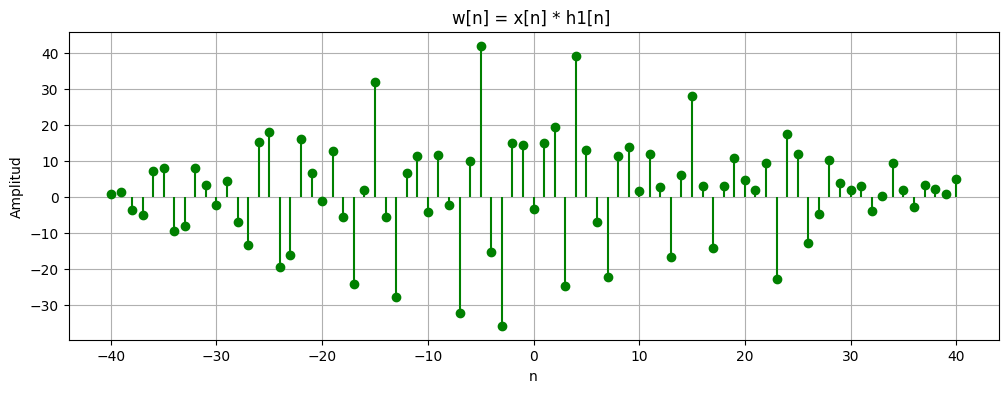

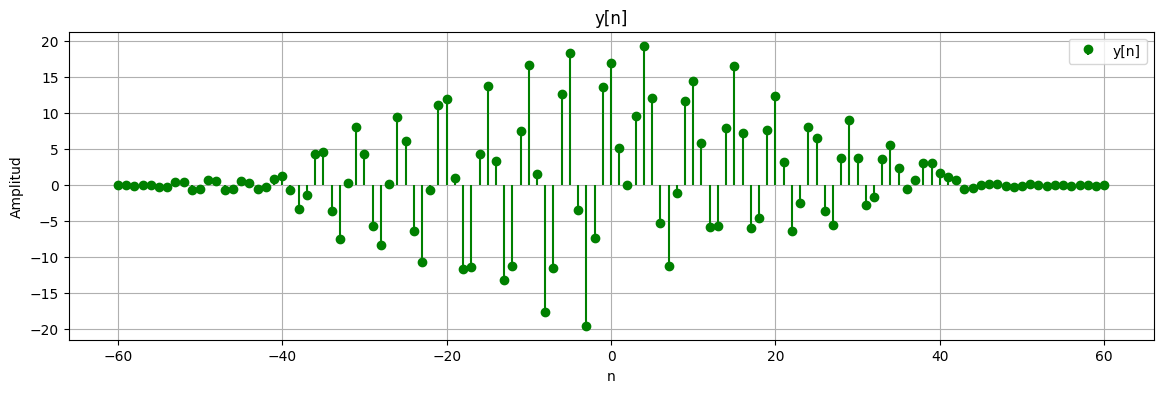

In [13]:

#-------- señal x[n] ------------
n = np.arange(-20, 21)
x_cos = np.cos(0.4 * np.pi * n)
x_sin = np.sin(0.6 * np.pi * n)
delta = np.where(n == 2, 1, 0)  # δ[n−2]
u = np.where(n >= 0, 1, 0)      # u[n]

x = x_cos + x_sin + 5 * delta + 2 * u

#-------- sistema 1 h1[n] ------------
x_shifted = np.roll(x, 1)
x_shifted[0] = 0
h1 = x - x_shifted

#-------- sistema 2 h2[n] ------------
h2 = 0.5 * np.sinc(n / 2)

#-------- señal w[n] ------------
w = np.convolve(x, h1, mode='full')
n_conv = np.arange(-40, 41)  # len(W)= 41 + 41 - 1 = 81 puntos


#-------- señal y[n] ------------
y = np.convolve(w, h2, mode='full')
# Longitud total: len(y)= 81 + 41 - 1 = 121 puntos
n_y = np.arange(-60, 61)

# Disable LaTeX rendering
plt.rc('text', usetex=False)

# ------ Graficos --------------
# x[n]
plt.stem(n, x)
plt.title("x[n] ")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()

# w[n]
plt.stem(n, h1)
plt.title("h1[n] ")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# h2[n]
plt.stem(n, h2)
plt.title("h2[n] ")
plt.xlabel('n')
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# w[n]
plt.figure(figsize=(12, 4))
plt.stem(n_conv, w, linefmt='g-', markerfmt='go', basefmt=' ')
plt.title("w[n] = x[n] * h1[n] ")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# y[n]
plt.figure(figsize=(14, 4))
plt.stem(n_y, y, linefmt='g-', markerfmt='go', basefmt=' ', label='y[n]')
plt.title("y[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

# **Ejericcio 2.55**

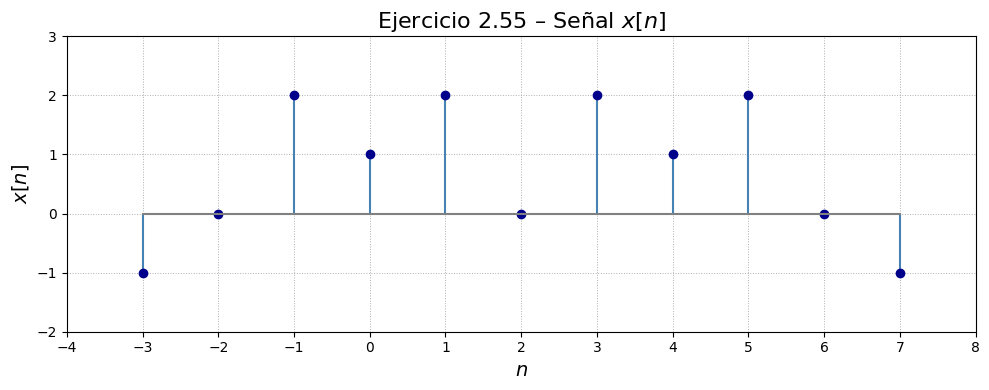

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/tmp/ipython-input-19-3198897923.py:79: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

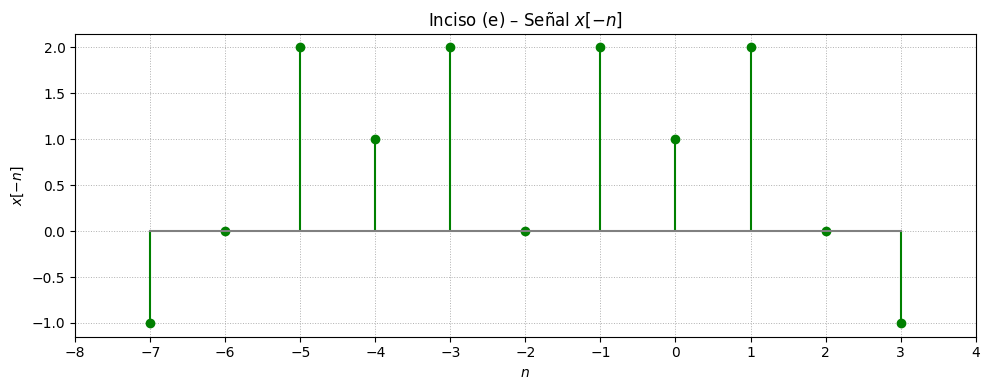

<IPython.core.display.Math object>

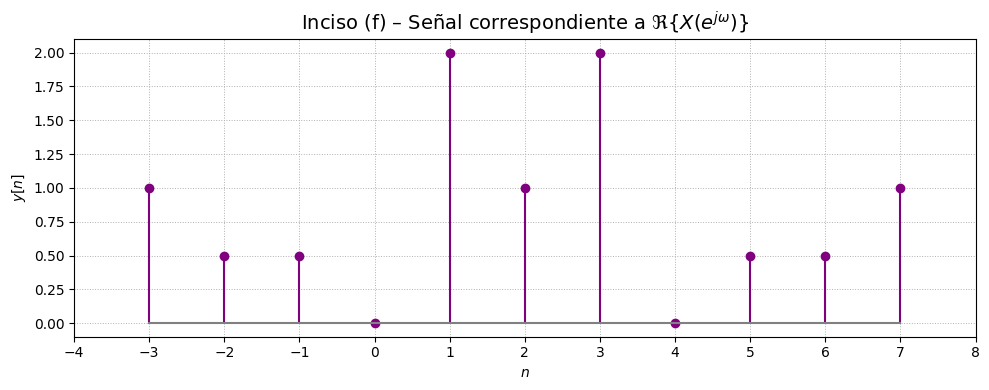

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math   # <- faltaba esta línea

# -------------------------------------------------------------------------
# Datos de la señal x[n]
# -------------------------------------------------------------------------
n = np.arange(-3, 8)
x = np.array([-1, 0, 2, 1, 2, 0, 2, 1, 2, 0, -1])

plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, x, basefmt="gray")
plt.setp(markerline, color='darkblue', marker='o')
plt.setp(stemlines, color='steelblue')
plt.setp(baseline, color='gray')
plt.title(r"Ejercicio 2.55 – Señal $x[n]$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$x[n]$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n[0] - 1, n[-1] + 2, 1))
plt.yticks(np.arange(-2, 4, 1))
plt.ylim(-2, 3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# Inciso (a)
# -------------------------------------------------------------------------
X_ej0 = x.sum()

latex_a = rf"""
\textbf{{Inciso (a)}}\quad
X(e^{{j0}})=\sum_{{n=-3}}^{{7}} x[n]=\boxed{{{X_ej0}}}
"""
display(Math(latex_a))

# -------------------------------------------------------------------------
# Inciso (b)
# -------------------------------------------------------------------------
signo_alternante = (-1.0) ** n           # ahora NumPy lo permite
X_ejpi = int(np.round(np.sum(x * signo_alternante)))

suma_detalle = " + ".join(f"{int(x[i])}·({int(signo_alternante[i])})"
                          for i in range(len(n)))

latex_b = rf"""
\textbf{{Inciso (b)}}\quad
X(e^{{j\pi}})=\sum_{{n=-3}}^{{7}} x[n](-1)^n
              ={suma_detalle}
              =\boxed{{{X_ejpi}}}
"""
display(Math(latex_b))

# -------------------------------------------------------------------------
# Inciso (c)
# -------------------------------------------------------------------------
latex_c = r"""
\textbf{Inciso (c)}\quad
\text{La señal }x[n]\text{ es simétrica respecto a }n_0=2
\;\Rightarrow\;
X(e^{j\omega}) = A(\omega)\,e^{-j2\omega}
\;\Rightarrow\;
\angle X(e^{j\omega}) = -2\omega.
"""
display(Math(latex_c))

# -------------------------------------------------------------------------
# Inciso (d)
# -------------------------------------------------------------------------
def compute_dtft(x_vals, n_vals, omega_vals):
    return np.array([
        np.sum(x_vals * np.exp(-1j * omega * n_vals))
        for omega in omega_vals
    ])

omega = np.linspace(-np.pi, np.pi, 1024)
X_omega = compute_dtft(x, n, omega)

integral_X = np.trapz(X_omega, omega)           # numérico
valor_teorico = 2 * np.pi * x[n == 0][0]        # 2π·x[0]

latex_d = rf"""
\textbf{{Inciso (d)}}\quad
\int_{{-\pi}}^{{\pi}} X(e^{{j\omega}})\,d\omega
    = 2\pi\,x[0]
    = 2\pi\cdot {x[n == 0][0]}
    = \boxed{{2\pi}}.
"""
display(Math(latex_d))

# -------------------------------------------------------------------------
# Inciso (e)
# -------------------------------------------------------------------------
y_flip = x[::-1]
n_flip = -n[::-1]

latex_e = r"""
\textbf{Inciso (e)}\quad
x[-n]\;\longleftrightarrow\;X(e^{-j\omega})
\quad\text{(reflejo temporal ↔ conjugación en frecuencia).}
"""
display(Math(latex_e))

plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n_flip, y_flip, basefmt="gray")
plt.setp(markerline, color='green', marker='o')
plt.setp(stemlines, color='green')
plt.setp(baseline, color='gray')
plt.title(r"Inciso (e) – Señal $x[-n]$")
plt.xlabel("$n$")
plt.ylabel("$x[-n]$")
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(min(n_flip) - 1, max(n_flip) + 2))
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# Inciso (f)
# -------------------------------------------------------------------------
latex_f = r"""
\textbf{Inciso (f)}\quad
\Re\{X(e^{j\omega})\}\;\longleftrightarrow\;
\frac{1}{2}\,\bigl[x[n+2] + x[n-2]\bigr].
"""
display(Math(latex_f))

# Construyo la señal cuya DTFT es la parte real:
x_ext = np.pad(x, (2, 2), 'constant')           # ceros a ambos lados
y_real = 0.5 * (x_ext[4:4+len(x)] + x_ext[0:len(x)])

plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, y_real, basefmt="gray")
plt.setp(markerline, color='purple', marker='o')
plt.setp(stemlines, color='purple')
plt.setp(baseline, color='gray')
plt.title(r"Inciso (f) – Señal correspondiente a $\Re\{X(e^{j\omega})\}$",
          fontsize=14)
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(min(n) - 1, max(n) + 2))
plt.tight_layout()
plt.show()


# **Ejercicio 2.56**

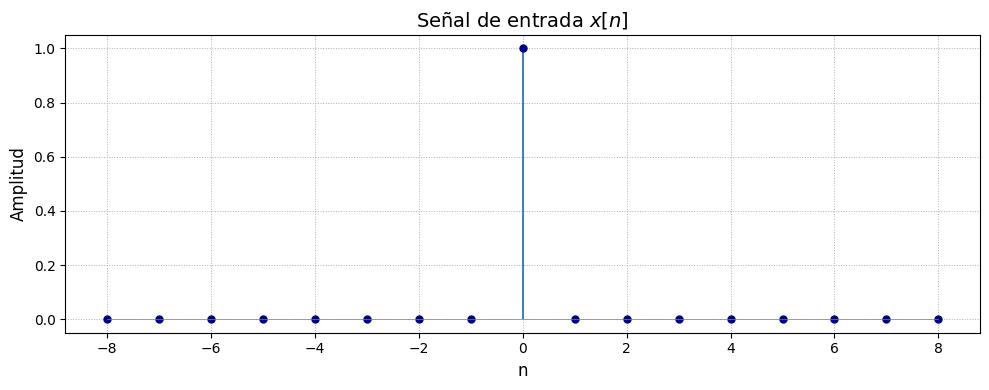

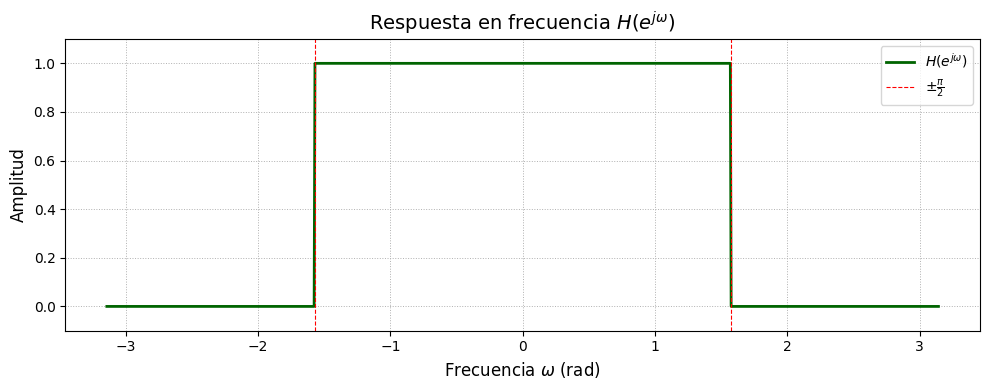

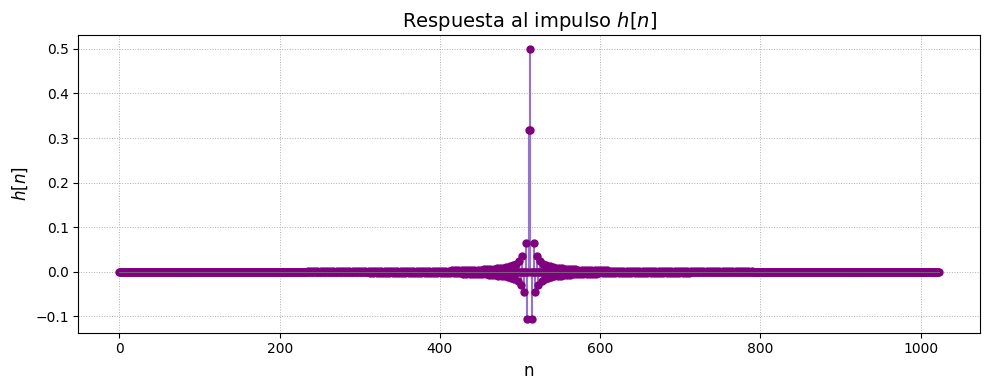

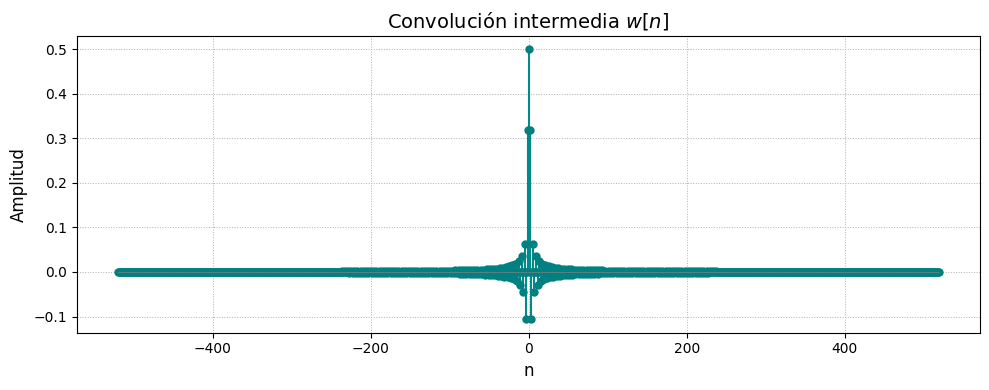

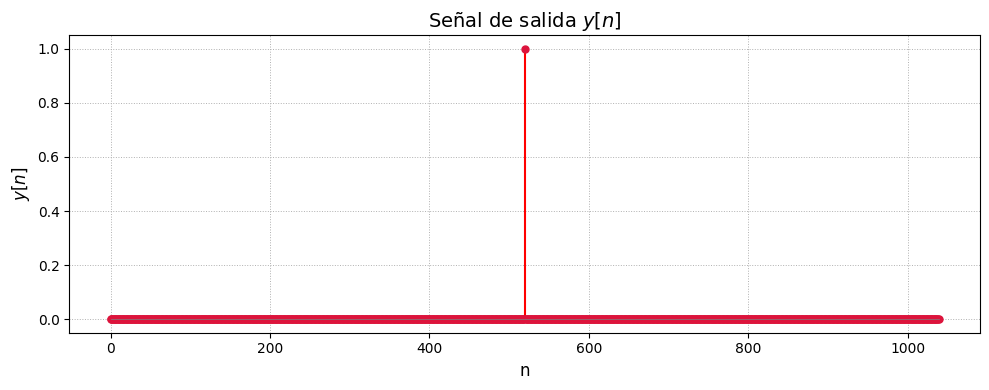

In [20]:
# Dado el sistema de la Figura P2.56, determine la salida y[n] cuando la entrada
# x[n] es δ[n] y H(ejω) es un filtro paso bajo ideal como se indica
import numpy as np
import matplotlib.pyplot as plt

#------------- H(ejw) ---------------------------
N = 1024
w = np.linspace(-np.pi, np.pi, 1024)
H_w = np.where(np.abs(w) < np.pi / 2, 1, 0)

H_shifted = np.fft.ifftshift(H_w)  # Llevar a orden natural
h_n = np.fft.ifft(H_shifted)       # IFFT
h_n = np.fft.fftshift(np.real(h_n))
n = np.arange(1024)


#------------------ x[n] -----------------------

l = 17
x = np.zeros(l)
x[l//2] = 1
n_x = np.arange(-(l//2), (l//2) + 1)

#------------------ w[n] -----------------------

w_sing = np.convolve(x, h_n, mode='full')
long=len(x)+len(h_n)-1
n_conv = np.arange(-(long // 2), (long + 1) // 2)


#------------------ y[n] -----------------------

n_y = np.arange(1040)
y = w_sing + ((-1)**n_y) * w_sing

# ---------------- Graficos -------------------


import numpy as np
import matplotlib.pyplot as plt

# --- x[n] ---
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n_x, x, basefmt="gray")
plt.setp(markerline, color='darkblue', marker='o', markersize=5)
plt.setp(stemlines, color='steelblue', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)
plt.title(r"Señal de entrada $x[n]$", fontsize=14)
plt.xlabel("n", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

# --- H(e^jw) ---
plt.figure(figsize=(10, 4))
plt.plot(w, H_w, label=r'$H(e^{j\omega})$', color='darkgreen', linewidth=2)
plt.axvline(-np.pi/2, color='r', linestyle='--', linewidth=0.8, label=r'$\pm\frac{\pi}{2}$')
plt.axvline(np.pi/2, color='r', linestyle='--', linewidth=0.8)
plt.title(r"Respuesta en frecuencia $H(e^{j\omega})$", fontsize=14)
plt.xlabel(r'Frecuencia $\omega$ (rad)', fontsize=12)
plt.ylabel(r'Amplitud', fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.legend(fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

# --- h[n] ---
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, np.real(h_n), basefmt="gray")
plt.setp(markerline, color='purple', marker='o', markersize=5)
plt.setp(stemlines, color='mediumpurple', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)
plt.title(r"Respuesta al impulso $h[n]$", fontsize=14)
plt.xlabel("n", fontsize=12)
plt.ylabel("$h[n]$", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

# --- w[n] ---
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n_conv, np.real(w_sing), basefmt="gray")
plt.setp(markerline, color='teal', marker='o', markersize=5)
plt.setp(stemlines, color='darkcyan', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)
plt.title(r"Convolución intermedia $w[n]$", fontsize=14)
plt.xlabel("n", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

# --- y[n] ---
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n_y, y, linefmt='r-', markerfmt='ro', basefmt='gray')
plt.setp(markerline, color='crimson', marker='o', markersize=5)
plt.setp(stemlines, color='red', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)
plt.title(r"Señal de salida $y[n]$", fontsize=14)
plt.xlabel("n", fontsize=12)
plt.ylabel("$y[n]$", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()


# **Ejercicio 2.77**

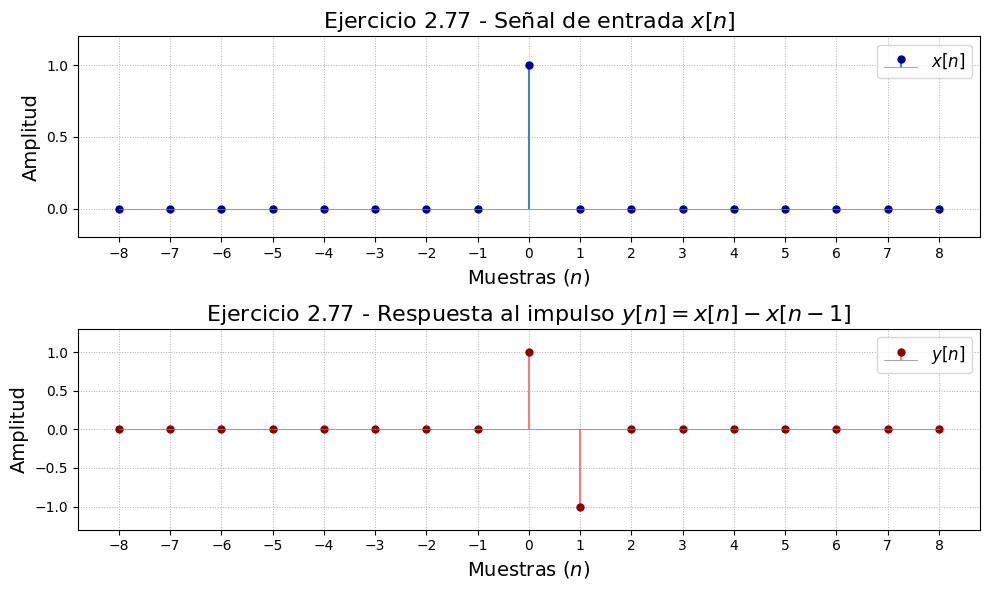

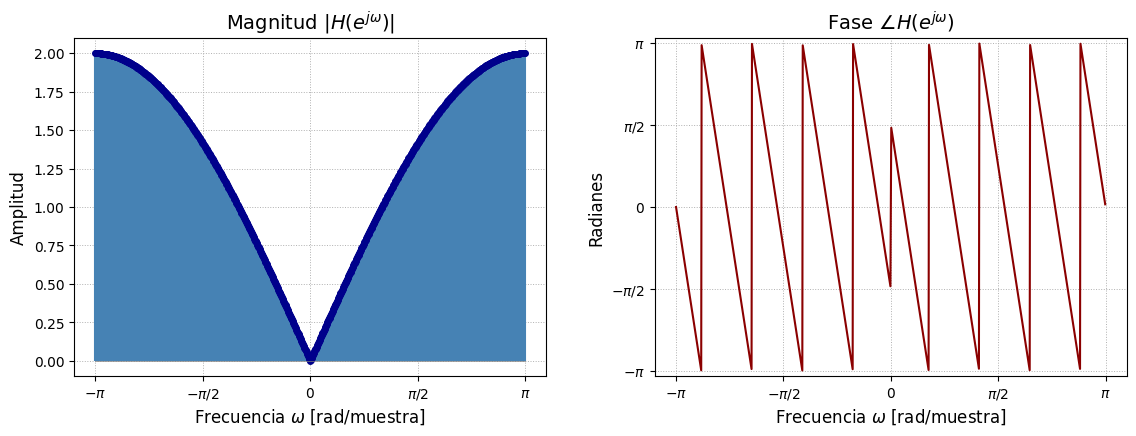

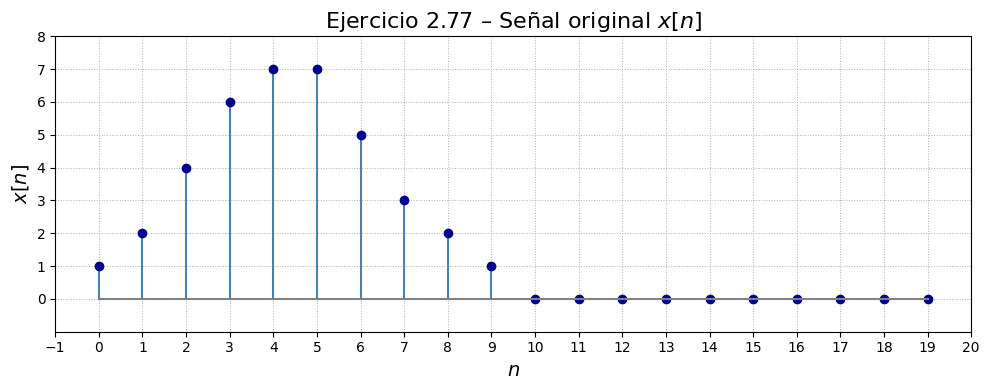

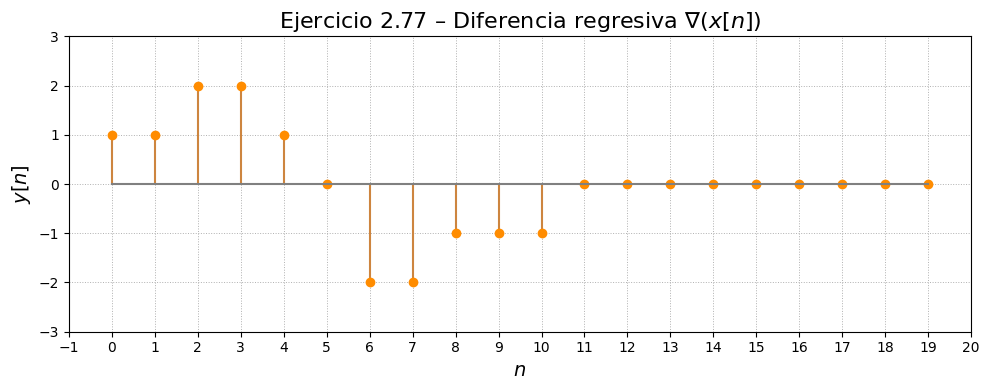

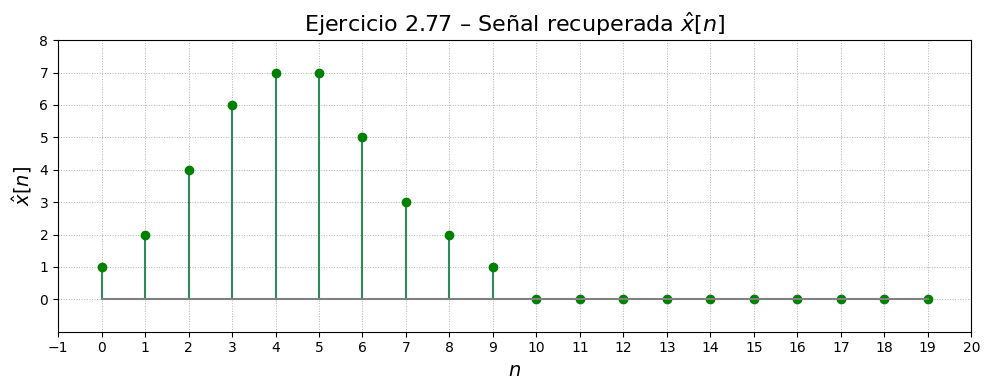

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy.signal import  convolve


# ----------------- x[n] -----------------
l = 17
x = np.zeros(l)
x[l//2] = 1
n_x = np.arange(-(l//2), (l//2) + 1)

# ----------------- Respuesta al impulso -----------------
y = np.zeros_like(x)
y[1:] = x[1:] - x[:-1]
y[0] = x[0]

# ----------------- Respuesta en frecuencia -----------------
M = 1024
H = fft(y, M)
H = fftshift(H)

omega = np.linspace(-np.pi, np.pi, M, endpoint=False)

magnitud = np.abs(H)
fase = np.angle(H)

# ----------------- Graficos -----------------

# x[n]
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(n_x, x, basefmt="gray")
plt.setp(markerline, color='darkblue', marker='o', markersize=5)
plt.setp(stemlines, color='steelblue', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)

plt.title(r"Ejercicio 2.77 - Señal de entrada $x[n]$", fontsize=16)
plt.xlabel(r"Muestras ($n$)", fontsize=14)
plt.ylabel(r"Amplitud", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n_x[0], n_x[-1]+1, 1))
plt.yticks(np.arange(0, 1.5, 0.5))
plt.ylim(-0.2, 1.2)
plt.legend(['$x[n]$'], fontsize=12)

# Respuesta al impulso h[n]
plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(n_x, y, basefmt="gray")
plt.setp(markerline, color='darkred', marker='o', markersize=5)
plt.setp(stemlines, color='lightcoral', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)

plt.title(r"Ejercicio 2.77 - Respuesta al impulso $y[n] = x[n] - x[n-1]$", fontsize=16)
plt.xlabel(r"Muestras ($n$)", fontsize=14)
plt.ylabel(r"Amplitud", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n_x[0], n_x[-1]+1, 1))
plt.yticks(np.arange(-1.5, 1.6, 0.5))
plt.ylim(-1.3, 1.3)
plt.legend(['$y[n]$'], fontsize=12)

plt.tight_layout()
plt.show()


# Respuesta en frecuencia  H(ejw)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
markerline, stemlines, baseline = plt.stem(omega, magnitud, basefmt="gray")
plt.setp(markerline, color='darkblue', marker='o', markersize=4)
plt.setp(stemlines, color='steelblue', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)

plt.title(r"Magnitud $|H(e^{j\omega})|$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-0.1, 2.1)

plt.subplot(1, 2, 2)
plt.plot(omega, fase, color='darkred', linewidth=1.5, linestyle='-')

plt.title(r"Fase $\angle H(e^{j\omega})$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=12)
plt.ylabel("Radianes", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-np.pi-0.1, np.pi+0.1)


plt.tight_layout(pad=3.0)
plt.show()


# =========================================
# e)
# =========================================


# ----------------- Señal de entrada x[n] -----------------
n = np.arange(0, 20)
x = np.array([1, 2, 4, 6, 7, 7, 5, 3, 2, 1] + [0]*10)

# ----------------- Diferencia regresiva: y[n] -----------------
y = x - np.roll(x, 1)
y[0] = x[0]

# ----------------- Sistema inverso: h_i[n] = u[n]  -----------------
h_i = np.ones(len(x))  # escalón unitario

#  ----------------- Recuperar x[n] por convolución: x̂[n] = h_i[n] * y[n]  -----------------
x_rec = convolve(y, h_i)[:len(x)]

# ----------------- Gráfica -----------------

# ----------------- x[n]  -----------------
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, x, basefmt="gray")
plt.setp(markerline, color='darkblue', marker='o')
plt.setp(stemlines, color='steelblue')
plt.setp(baseline, color='gray')
plt.title(r"Ejercicio 2.77 – Señal original $x[n]$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$x[n]$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n[0] - 1, n[-1] + 2, 1))
plt.yticks(np.arange(0, np.max(x)+2, 1))
plt.ylim(-1, np.max(x)+1)
plt.tight_layout()
plt.show()

# ----------------- y[n] = ∇(x[n]  -----------------
plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, y, basefmt="gray")
plt.setp(markerline, color='darkorange', marker='o')
plt.setp(stemlines, color='peru')
plt.setp(baseline, color='gray')
plt.title(r"Ejercicio 2.77 – Diferencia regresiva $\nabla(x[n])$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$y[n]$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n[0] - 1, n[-1] + 2, 1))
plt.yticks(np.arange(np.min(y)-1, np.max(y)+2, 1))
plt.ylim(np.min(y)-1, np.max(y)+1)
plt.tight_layout()
plt.show()

# ----------------- x̂[n] = h_i[n] * ∇(x[n]  -----------------

plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, x_rec, basefmt="gray")
plt.setp(markerline, color='green', marker='o')
plt.setp(stemlines, color='seagreen')
plt.setp(baseline, color='gray')
plt.title(r"Ejercicio 2.77 – Señal recuperada $\hat{x}[n]$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$\hat{x}[n]$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n[0] - 1, n[-1] + 2, 1))
plt.yticks(np.arange(0, np.max(x)+2, 1))
plt.ylim(-1, np.max(x)+1)
plt.tight_layout()
plt.show()


# **Ejercicio 3**

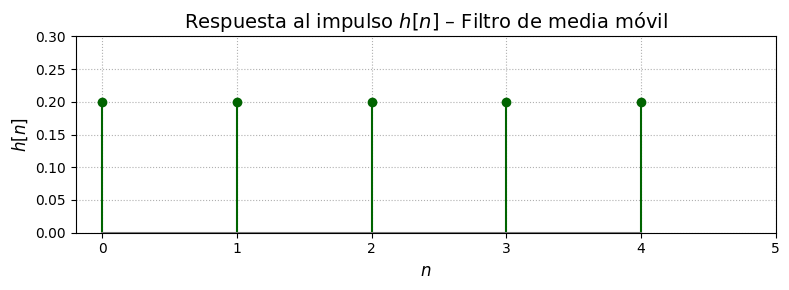

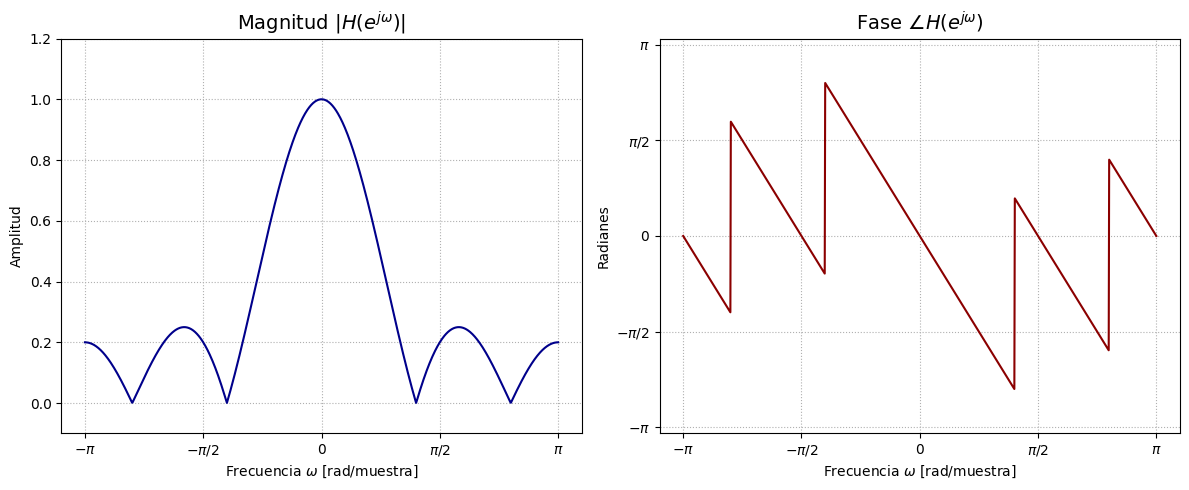

In [22]:
# Filtro de media móvil


# ----------------- Variables  -----------------
M1 = 0
M2 = 4
M = M1 + M2 + 1

h = np.ones(M) / M
n = np.arange(M1, M2 + 1)


# ----------------- Graficos -----------------

# ----------------- h[n] -----------------

plt.figure(figsize=(8, 3))
plt.stem(n, h, basefmt="gray", linefmt='darkgreen', markerfmt='o')
plt.title(r"Respuesta al impulso $h[n]$ – Filtro de media móvil", fontsize=14)
plt.xlabel(r"$n$", fontsize=12)
plt.ylabel(r"$h[n]$", fontsize=12)
plt.grid(True, linestyle=':')
plt.xticks(np.arange(0, M + 1, 1))
plt.ylim(0, 0.3)
plt.tight_layout()
plt.show()

# =========================================
# 3) Modulo y fase de la respuesta en frecuencia obtenida
#     análiticamente, ver "Ejercicio 3" en Overleaf
# =========================================

omega = np.linspace(-np.pi, np.pi, 1024)
H = (np.sin(5 * omega / 2) / (5 * np.sin(omega / 2))) * np.exp(-1j * 2 * omega)

mag_H = np.abs(H)
fase_H = np.angle(H)

# ----------------- Graficos -----------------

# ----------------- H(ejw) Modulo -----------------
plt.figure(figsize=(12, 5))


# Modulo
plt.subplot(1, 2, 1)
plt.plot(omega, mag_H, color='darkblue')
plt.title(r"Magnitud $|H(e^{j\omega})|$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]")
plt.ylabel("Amplitud")
plt.grid(True, linestyle=':')
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-0.1, 1.2)

# ----------------- H(ejw) Fase -----------------
plt.subplot(1, 2, 2)
plt.plot(omega, fase_H, color='darkred')
plt.title(r"Fase $\angle H(e^{j\omega})$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]")
plt.ylabel("Radianes")
plt.grid(True, linestyle=':')
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-np.pi - 0.1, np.pi + 0.1)

plt.tight_layout()
plt.show()

/tmp/ipython-input-23-3431547881.py:20: RuntimeWarning:

invalid value encountered in divide



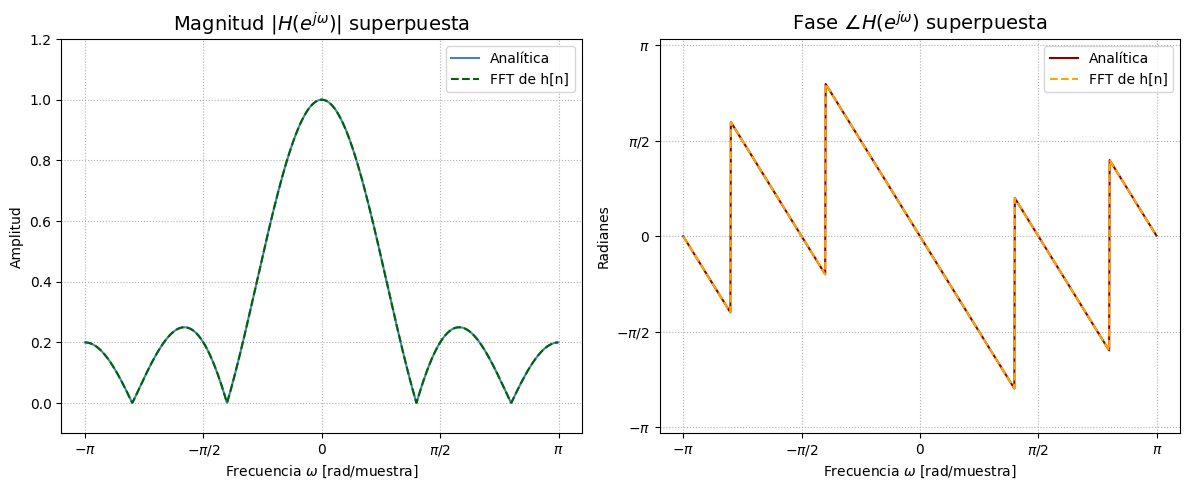

In [23]:

# =========================================
# 4) Modulo y fase de la respuesta en frecuencia obtenida con "fft".
#    Gráfico superpuesto con la respuesta en frecuencia analítica
# =========================================


# ----------------- Variables -----------------
N = 1024
x_impulso = np.zeros(N)
x_impulso[0] = 1

# ----------------- h[n] -----------------
h = np.ones(M) / M

# ----------------- H(ejw)  -----------------
H_fft = fftshift(fft(h, N))
omega = np.linspace(-np.pi, np.pi, N, endpoint=False)

# Expresion analitica
H_expr = (np.sin(5 * omega / 2) / (5 * np.sin(omega / 2))) * np.exp(-1j * 2 * omega)

# ----------------- Moudlo y Fase -----------------
mag_fft = np.abs(H_fft)
fase_fft = np.angle(H_fft)

mag_expr = np.abs(H_expr)
fase_expr = np.angle(H_expr)

# ----------------- Graficos -----------------
plt.figure(figsize=(12, 5))

# ----------------- Modulo -----------------
plt.subplot(1, 2, 1)
plt.plot(omega, mag_expr, label="Analítica", color='steelblue')
plt.plot(omega, mag_fft, label="FFT de h[n]", linestyle='--', color='darkgreen')
plt.title(r"Magnitud $|H(e^{j\omega})|$ superpuesta", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]")
plt.ylabel("Amplitud")
plt.grid(True, linestyle=':')
plt.legend()
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-0.1, 1.2)

# ----------------- fase -----------------
plt.subplot(1, 2, 2)
plt.plot(omega, fase_expr, label="Analítica", color='darkred')
plt.plot(omega, fase_fft, label="FFT de h[n]", linestyle='--', color='orange')
plt.title(r"Fase $\angle H(e^{j\omega})$ superpuesta", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]")
plt.ylabel("Radianes")
plt.grid(True, linestyle=':')
plt.legend()
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-np.pi - 0.1, np.pi + 0.1)

plt.tight_layout()
plt.show()

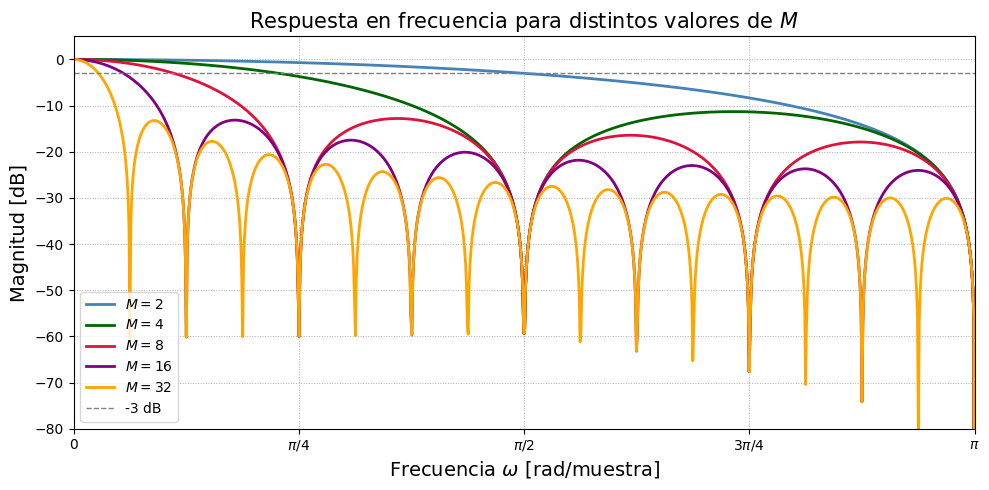

In [24]:
# ========================================================================
# 6) Barrido de M2 graficando la magnitud en función de la frecuencia
#           Reimportar librerías tras el reset del entorno
# ========================================================================


# ----------------- Variables -----------------
M_list = [2, 4, 8, 16, 32]
colores = ['steelblue', 'darkgreen', 'crimson', 'purple', 'orange']
labels = []

w = np.linspace(0, np.pi, 1024)

plt.figure(figsize=(10, 5))

# Calcular y graficar respuesta en frecuencia para cada M
for i, M in enumerate(M_list):
    h = np.ones(M) / M
    _, H = freqz(h, worN=w)

    # Magnitud en dB
    H_dB = 20 * np.log10(np.abs(H))

    plt.plot(w, H_dB, color=colores[i % len(colores)], linewidth=2)
    labels.append(f"$M = {M}$")

# Línea de referencia -3 dB
plt.axhline(-3, color='gray', linestyle='--', linewidth=1, label="-3 dB")

# ----------------- Graficos -----------------
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=14)
plt.ylabel("Magnitud [dB]", fontsize=14)
plt.title("Respuesta en frecuencia para distintos valores de $M$", fontsize=15)
plt.xticks(np.linspace(0, np.pi, 5),
           [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])
plt.xlim([0, np.pi])
plt.ylim([-80, 5])
plt.legend(labels + ["-3 dB"], loc='lower left')
plt.tight_layout()
plt.show()


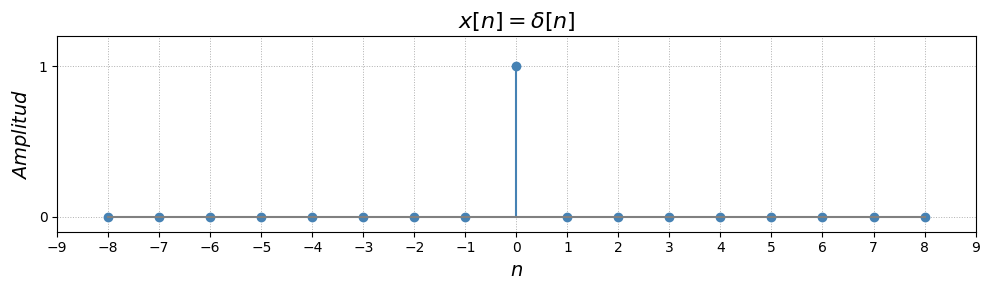

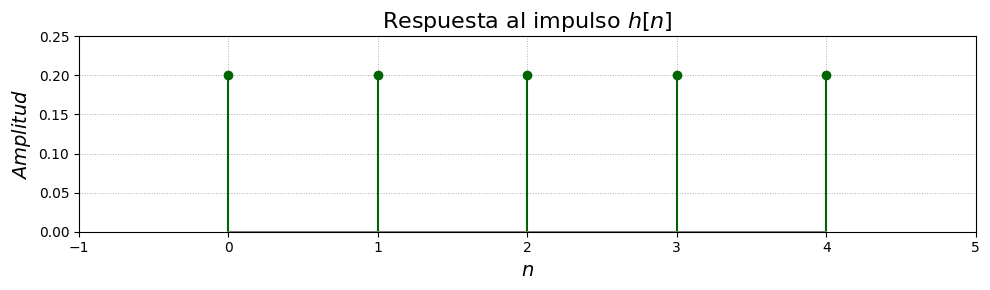

/tmp/ipython-input-25-1237666766.py:115: RuntimeWarning:

divide by zero encountered in log10



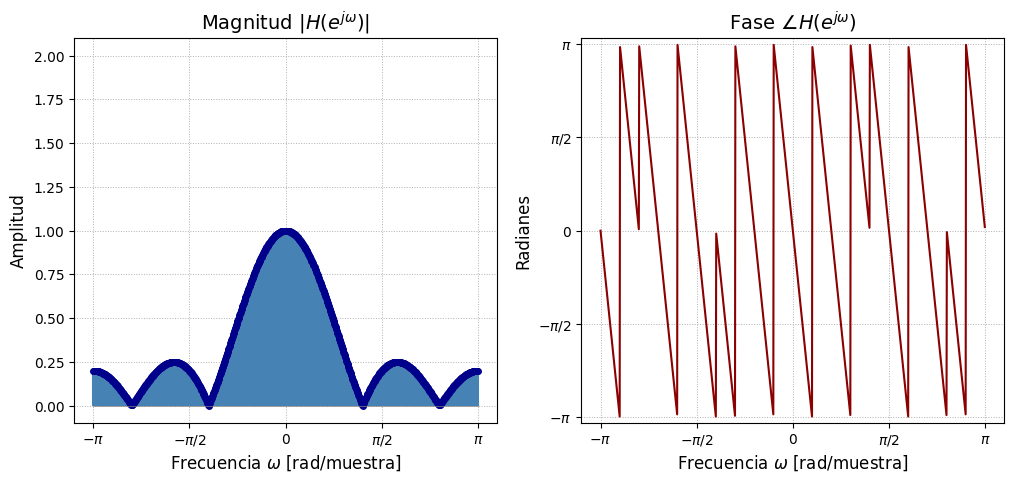

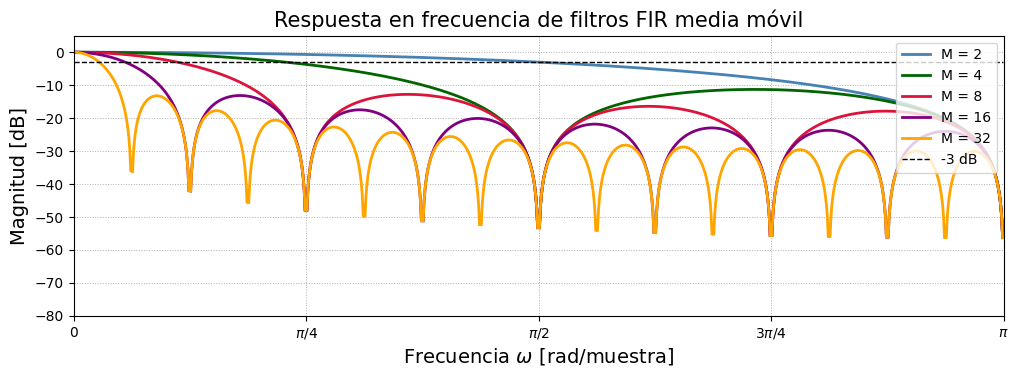

In [25]:
# ============================
# ) Filtro de media móvil
# ============================

# ----------------- Variables -----------------
m1 = 0
m2 = 4
M = m1 + m2 + 1  # Longitud del filtro

# ----------------- x[n] = δ[n] -----------------

l = 17
x = np.zeros(l)
x[l//2] = 1
n_x = np.arange(-(l//2), (l//2) + 1)

h = np.ones(M) / M
n_h = np.arange(-m1, m2 + 1)

# ----------------- Respuesta al impulso -----------------
y = lfilter(h, 1, x)

# calculamos la FFT para determinar la respuesta en frecuencia
N_fft = 1024
H = fft(y, N_fft)
H = fftshift(H)

omega = np.linspace(-np.pi, np.pi,  N_fft, endpoint=False)

magnitud = np.abs(H)
fase = np.angle(H)



# ----------------- Graficos -----------------

# ----------------- x[n] -----------------

plt.figure(figsize=(10, 3))
plt.stem(n_x, x, basefmt="gray", linefmt='steelblue', markerfmt='o')
plt.title(r"$x[n] = \delta[n]$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$Amplitud$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n_x[0] - 1, n_x[-1] + 2, 1))
plt.yticks(np.arange(0, 2, 1))
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.show()

# ----------------- h[n] -----------------
plt.figure(figsize=(10, 3))
plt.stem(n_h, h, basefmt="gray", linefmt='darkgreen', markerfmt='o')
plt.title(r"Respuesta al impulso $h[n]$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$Amplitud$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.arange(n_h[0] - 1, n_h[-1] + 2, 1))
plt.ylim(0, max(h) + 0.05)
plt.tight_layout()
plt.show()



# ----------------- H(ejw) -----------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
markerline, stemlines, baseline = plt.stem(omega, magnitud, basefmt="gray")
plt.setp(markerline, color='darkblue', marker='o', markersize=4)
plt.setp(stemlines, color='steelblue', linewidth=1.5)
plt.setp(baseline, color='gray', linewidth=0.5)

plt.title(r"Magnitud $|H(e^{j\omega})|$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-0.1, 2.1)

plt.subplot(1, 2, 2)
plt.plot(omega, fase, color='darkred', linewidth=1.5, linestyle='-')

plt.title(r"Fase $\angle H(e^{j\omega})$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=12)
plt.ylabel("Radianes", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.ylim(-np.pi-0.1, np.pi+0.1)


# ============================
# 4.6)
# ============================


M_list = [2, 4, 8, 16, 32]
colores = ['steelblue', 'darkgreen', 'crimson', 'purple', 'orange']

plt.figure(figsize=(12, 8))

# Magnitud en dB
plt.subplot(2, 1, 1)
labels = []

for i, M in enumerate(M_list):

    h = np.ones(M) / M
    w, H = freqz(h, 1, worN=1024)

    # Magnitud en dB
    H_dB = 20 * np.log10(np.abs(H))


    plt.plot(w, H_dB, color=colores[i], linewidth=2)
    labels.append(f"M = {M}")

# Línea de referencia -3 dB
plt.plot(w, -3 * np.ones_like(w), '--k', linewidth=1)
labels.append("-3 dB")

plt.grid(True, linestyle=':', linewidth=0.7)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=14)
plt.ylabel("Magnitud [dB]", fontsize=14)
plt.title("Respuesta en frecuencia de filtros FIR media móvil", fontsize=15)
plt.xlim([0, np.pi])
plt.ylim([-80, 5])  # Ajustar límites para mejor visualización
plt.xticks(np.linspace(0, np.pi, 5),
           [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
plt.legend(labels, loc='upper right')

plt.show()


# **Actividad 4**

5.421010862427522e-20


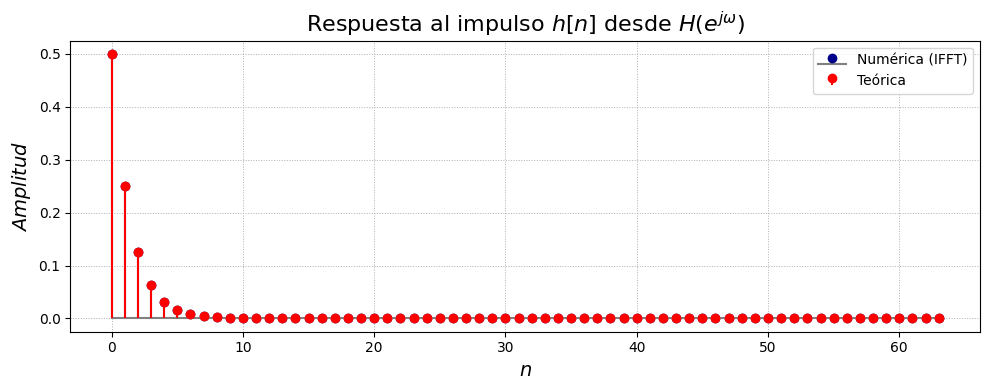

In [3]:

# ============================
# 4.3)
# ============================


# ----------------- Variables -----------------
alpha = 0.5
N = 64
w = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Respuesta en frecuencia analítica
H_w = (1 - alpha) / (1 - alpha * np.exp(-1j * w))

# Respuesta al impulso por IFFT
h_num = np.fft.ifft(H_w).real

# Respuesta al impulso teórica
n = np.arange(N)
h_teo = (1 - alpha) * alpha**n

print(h_teo[63])


# ---------- Graficos  ------------
# --- h[n] ---
plt.figure(figsize=(10, 4))
markerline1, stemlines1, baseline1 = plt.stem(n, h_num, basefmt="gray", label="Numérica (IFFT)")
plt.setp(markerline1, color='darkblue', marker='o')
plt.setp(stemlines1, color='steelblue')
plt.setp(baseline1, color='gray')

markerline2, stemlines2, baseline2 = plt.stem(n, h_teo, linefmt='r-', markerfmt='ro', basefmt=" ", label="Teórica")
plt.title(r"Respuesta al impulso $h[n]$ desde $H(e^{j\omega})$", fontsize=16)
plt.xlabel(r"$n$", fontsize=14)
plt.ylabel(r"$Amplitud$", fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

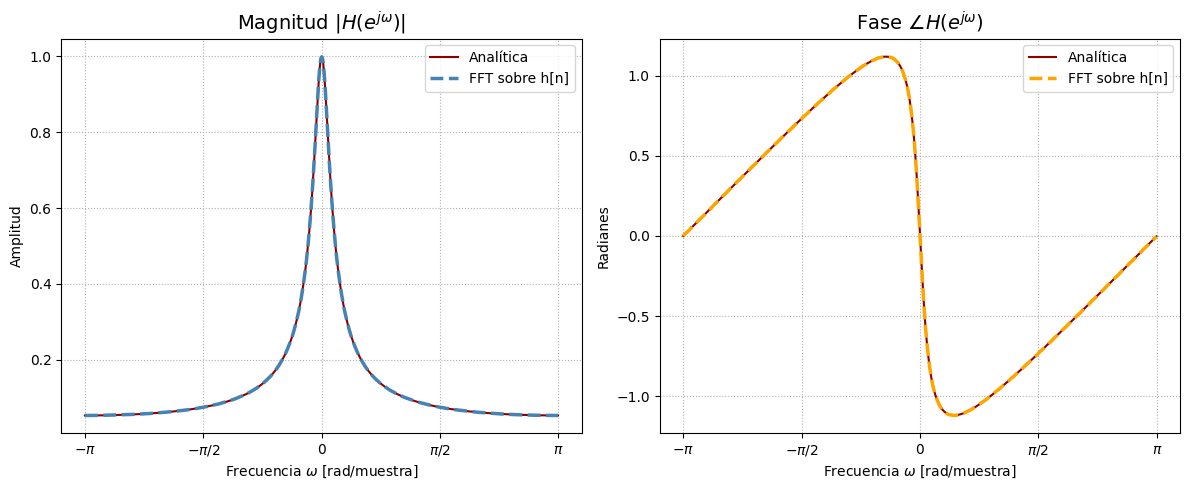

In [4]:
# ============================
# 4.4)
# ============================

# ----------------- Variables -----------------
alpha = 0.9

# Respuesta al impulso (h[n] = (1 - alpha) * alpha^n * u[n])
N = 64
n = np.arange(N)
h = (1 - alpha) * alpha**n

# Respuesta en frecuencia (FFT)
w = np.linspace(-np.pi, np.pi, 1024, endpoint=False)
H_fft = np.fft.fftshift(np.fft.fft(h, 1024))
magnitud_fft = np.abs(H_fft)
fase_fft = np.angle(H_fft)

# Respuesta en frecuencia analítica
H_analitica = (1 - alpha) / (1 - alpha * np.exp(-1j * w))
magnitud_analitica = np.abs(H_analitica)
fase_analitica = np.angle(H_analitica)

plt.figure(figsize=(12, 5))

# Magnitud
plt.subplot(1, 2, 1)
plt.plot(w, magnitud_analitica, label="Analítica", color='darkred')
plt.plot(w, magnitud_fft, label="FFT sobre h[n]", linestyle='--', color='steelblue', linewidth=2.5)
plt.title(r"Magnitud $|H(e^{j\omega})|$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True, linestyle=':')
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

# Fase
plt.subplot(1, 2, 2)
plt.plot(w, fase_analitica, label="Analítica", color='darkred')
plt.plot(w, fase_fft, label="FFT sobre h[n]", linestyle='--', color='orange', linewidth=2.5)
plt.title(r"Fase $\angle H(e^{j\omega})$", fontsize=14)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]")
plt.ylabel("Radianes")
plt.legend()
plt.grid(True, linestyle=':')
plt.xticks(np.linspace(-np.pi, np.pi, 5),
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.tight_layout()
plt.show()


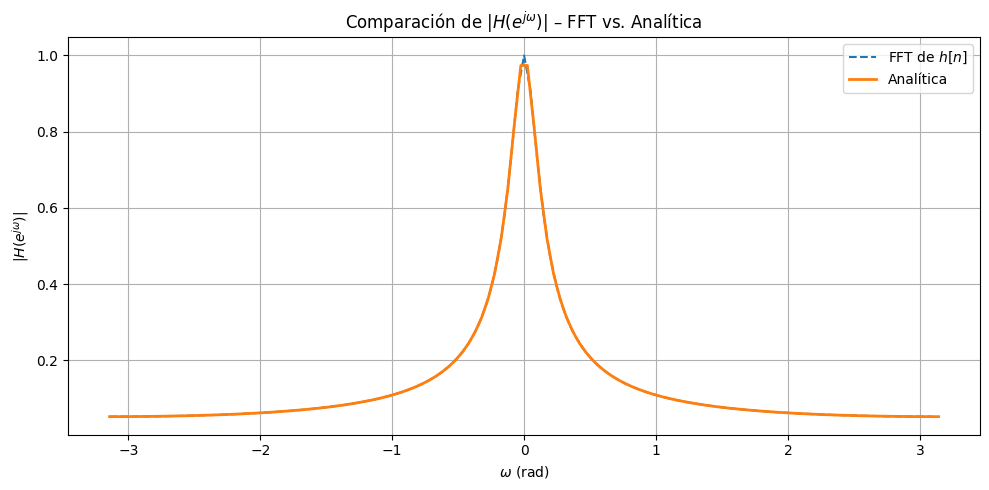

In [5]:

alpha = 0.9
N = 128

# Calcular la respuesta al impulso h[n]
n = np.arange(N)
h_n = (1 - alpha) * alpha**n  # u[n] implícito porque n >= 0

# Calcular la respuesta en frecuencia usando FFT
H_fft = np.fft.fft(h_n, N)
w_fft = np.fft.fftfreq(N, d=1) * 2 * np.pi  # Rango de frecuencias en radianes
w_fft = np.fft.fftshift(w_fft)
H_fft = np.fft.fftshift(H_fft)

# Calcular la respuesta en frecuencia analítica
w = np.linspace(-np.pi, np.pi, N)
H_analitica = (1 - alpha) / (1 - alpha * np.exp(-1j * w))

# Graficar ambas respuestas en frecuencia
plt.figure(figsize=(10, 5))
plt.plot(w_fft, np.abs(H_fft), label="FFT de $h[n]$", linestyle="--")
plt.plot(w, np.abs(H_analitica), label="Analítica", linewidth=2)
plt.title(r"Comparación de $|H(e^{j\omega})|$ – FFT vs. Analítica")
plt.xlabel(r'$\omega$ (rad)')
plt.ylabel(r'$|H(e^{j\omega})|$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
# =============================================================
# 4.6) Ejercicio con go, para poder modificar los graficos
# =============================================================
import plotly.graph_objects as go
# Vector alfa
alfa_vec = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
colores = ['steelblue', 'darkgreen', 'crimson', 'orange', 'purple', 'black']


w = np.linspace(0, np.pi, 1024)

fig = go.Figure()

# Agregar curvas para cada alpha
for i, alpha in enumerate(alfa_vec):
    b = [1 - alpha]
    a = [1, -alpha]
    _, H = freqz(b, a, worN=w)
    H_dB = 20 * np.log10(np.abs(H))

    fig.add_trace(go.Scatter(
        x=w,
        y=H_dB,
        mode='lines',
        name=f"α = {alpha}",
        line=dict(color=colores[i % len(colores)], width=2)
    ))

# Línea de -3 dB
fig.add_trace(go.Scatter(
    x=w,
    y=-3 * np.ones_like(w),
    mode='lines',
    name='-3 dB',
    line=dict(color='gray', dash='dash')
))

# Layout del gráfico
fig.update_layout(
    title="Respuesta en frecuencia del filtro IIR para distintos valores de α (interactivo)",
    xaxis_title="Frecuencia ω [rad/muestra]",
    yaxis_title="Magnitud [dB]",
    template="simple_white",
    hovermode="x unified",
    xaxis=dict(
        tickmode='array',
        tickvals=np.linspace(0, np.pi, 5),
        ticktext=[r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
    ),
    yaxis=dict(range=[-40, 2])
)

fig.show()



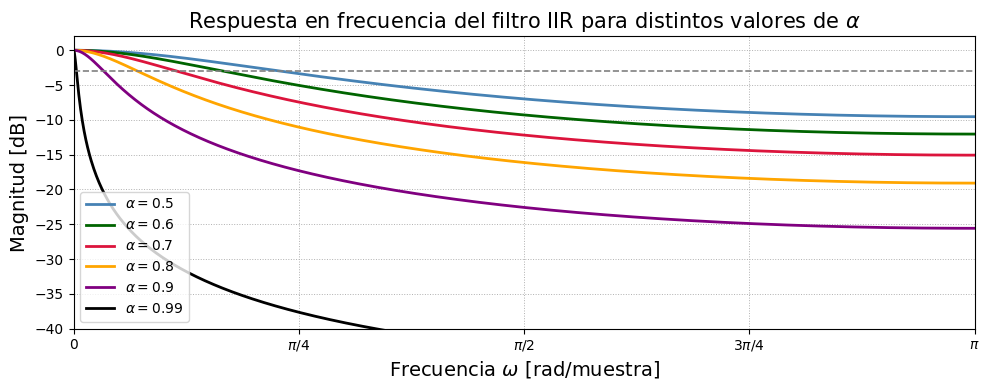

In [7]:
# =========================================
# 4.6)
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Vector alfa
alfa_vec = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
colores = ['steelblue', 'darkgreen', 'crimson', 'orange', 'purple', 'black']

# Frecuencias
w = np.linspace(0, np.pi, 1024)

# Crear figura
plt.figure(figsize=(10, 4))
labels = []

# Graficar cada curva de α
for i, alpha in enumerate(alfa_vec):
    b = [1 - alpha]
    a = [1, -alpha]
    _, H = freqz(b, a, worN=w)
    H_dB = 20 * np.log10(np.abs(H))

    plt.plot(w, H_dB, linewidth=2, color=colores[i % len(colores)])
    labels.append(rf"$\alpha = {alpha}$")

# Línea de -3 dB
plt.axhline(-3, color='gray', linestyle='--', linewidth=1.2, label=r"$-3$ dB")

# Formato del gráfico
plt.grid(True, linestyle=':', linewidth=0.7)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=14)
plt.ylabel("Magnitud [dB]", fontsize=14)
plt.title("Respuesta en frecuencia del filtro IIR para distintos valores de $\\alpha$", fontsize=15)
plt.xlim([0, np.pi])
plt.ylim([-40, 2])
plt.xticks(np.linspace(0, np.pi, 5),
           [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
plt.legend(labels)
plt.tight_layout()
plt.show()


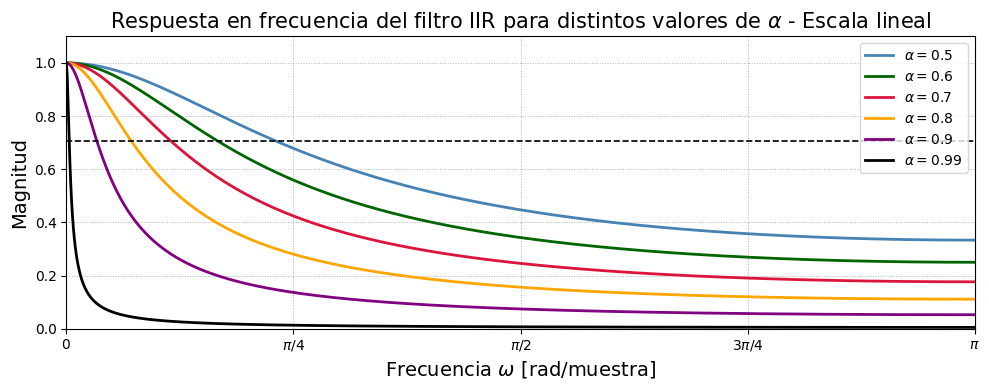

In [8]:
# =========================================
# 4.) Grafico lineal
# =========================================

alfa_vec = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
colores = ['steelblue', 'darkgreen', 'crimson', 'orange', 'purple', 'black']

w = np.linspace(0, np.pi, 1024)

plt.figure(figsize=(10, 4))
labels = []

for i, alpha in enumerate(alfa_vec):
    b = [1 - alpha]
    a = [1, -alpha]
    w_f, H = freqz(b, a, worN=w)
    H_mag = np.abs(H)  # Magnitud lineal en lugar de dB

    plt.plot(w_f, H_mag, linewidth=2, color=colores[i % len(colores)])
    labels.append(rf"$\alpha = {alpha}$")

# --- Línea horizontal de 0.707 (equivalente a -3 dB) ---
plt.axhline(0.707, color='k', linestyle='--', linewidth=1.2, label=r"$0.707$ (-3 dB)")

plt.grid(True, linestyle=':', linewidth=0.7)
plt.xlabel(r"Frecuencia $\omega$ [rad/muestra]", fontsize=14)
plt.ylabel("Magnitud", fontsize=14)
plt.title("Respuesta en frecuencia del filtro IIR para distintos valores de $\\alpha$ - Escala lineal", fontsize=15)
plt.xlim([0, np.pi])
plt.ylim([0, 1.1])  # Límites apropiados para escala lineal
plt.xticks(np.linspace(0, np.pi, 5),
           [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
plt.legend(labels)
plt.tight_layout()
plt.show()

In [9]:
# =========================================
# 4.7)
# =========================================

# ---------------------- Filtro IRR ----------------------
# ---- Variables ---
alpha = 0.95
N = 2048
w = np.linspace(0, np.pi, N)
H_w = (1 - alpha) / (1 - alpha * np.exp(-1j * w))
mag = np.abs(H_w)

# Buscamos el índice donde la magnitud cae por debajo de 1/sqrt(2)
corte_db = 1/np.sqrt(2)
i = np.where(mag <= corte_db)[0][0]
omega_3db = w[i]

print(f"Ancho de banda del IIR (α = 0.95): ω = {omega_3db:.4f} rad")

# ---------------------- Filtro FIR ----------------------
corte_w = omega_3db

w = np.linspace(0, np.pi, N)

def find_bandwidth_fir(M):
    h_fir = np.ones(M) / M
    H = np.fft.fft(h_fir, N)
    H = np.abs(H[:N//2])
    idx = np.where(H <= corte_w)[0][0]
    return w[idx]

# Buscamos M a prueba error, con un error de 0.001
for M in range(5, 2000):
    wb = find_bandwidth_fir(M)
    if abs(wb - corte_w) < 0.001:
        print(f"Ancho de banda de FIR con M = {M}: ω ≈ {wb:.4f} rad")
        break


Ancho de banda del IIR (α = 0.95): ω = 0.0522 rad
Ancho de banda de FIR con M = 58: ω ≈ 0.0522 rad
